In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [105]:
df=pd.read_csv('covid19worldwide1April18_to_May18.csv',parse_dates=['Date'])
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [106]:
df1=pd.read_csv('covid19worldwide2populationstructure_by_age_per_country.csv')
df1.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


task 1 death prediction

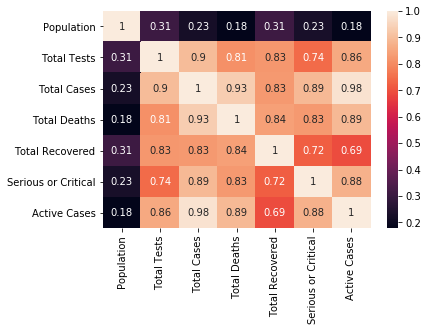

In [107]:
sns.heatmap(df.corr(),annot=True)

In [108]:
df['Date'].value_counts()

2020-05-01    213
2020-04-20    213
2020-05-10    213
2020-04-27    213
2020-05-06    213
2020-04-23    213
2020-05-15    213
2020-05-02    213
2020-04-19    213
2020-05-11    213
2020-04-28    213
2020-05-07    213
2020-04-24    213
2020-05-16    213
2020-05-03    213
2020-05-12    213
2020-05-14    213
2020-04-29    213
2020-05-08    213
2020-04-25    213
2020-05-17    213
2020-05-04    213
2020-04-21    213
2020-05-13    213
2020-04-30    213
2020-05-09    213
2020-04-26    213
2020-05-18    213
2020-05-05    213
2020-04-22    213
2020-04-18    213
Name: Date, dtype: int64

In [109]:
df.head(60)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
5,2020-04-18,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0
6,2020-04-18,France,65256826,463662.0,151793.0,19323.0,35983.0,5833.0,96487.0
7,2020-04-18,Germany,83752855,1728357.0,143724.0,4538.0,85400.0,2922.0,53786.0
8,2020-04-18,Turkey,84230075,598933.0,82329.0,1890.0,10453.0,1894.0,69986.0
9,2020-04-18,Iran,83862642,330137.0,80868.0,5031.0,55987.0,3513.0,19850.0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 6603 non-null   datetime64[ns]
 1   Country              6603 non-null   object        
 2   Population           6603 non-null   int64         
 3   Total Tests          5505 non-null   float64       
 4   Total Cases          6554 non-null   float64       
 5   Total Deaths         5367 non-null   float64       
 6   Total Recovered      6318 non-null   float64       
 7   Serious or Critical  4117 non-null   float64       
 8   Active Cases         6544 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 464.4+ KB


In [111]:
df.describe(include='all')

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6603,6603,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
unique,31,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-05-01 00:00:00,British Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,213,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2020-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,NaN,NaN,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,NaN,NaN,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,NaN,NaN,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01


In [112]:
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


In [113]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

British Virgin Islands    31
Israel                    31
Malta                     31
Bangladesh                31
Hong Kong                 31
                          ..
UAE                       31
Barbados                  31
Vietnam                   31
Montserrat                31
Peru                      31
Name: Country, Length: 213, dtype: int64



(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

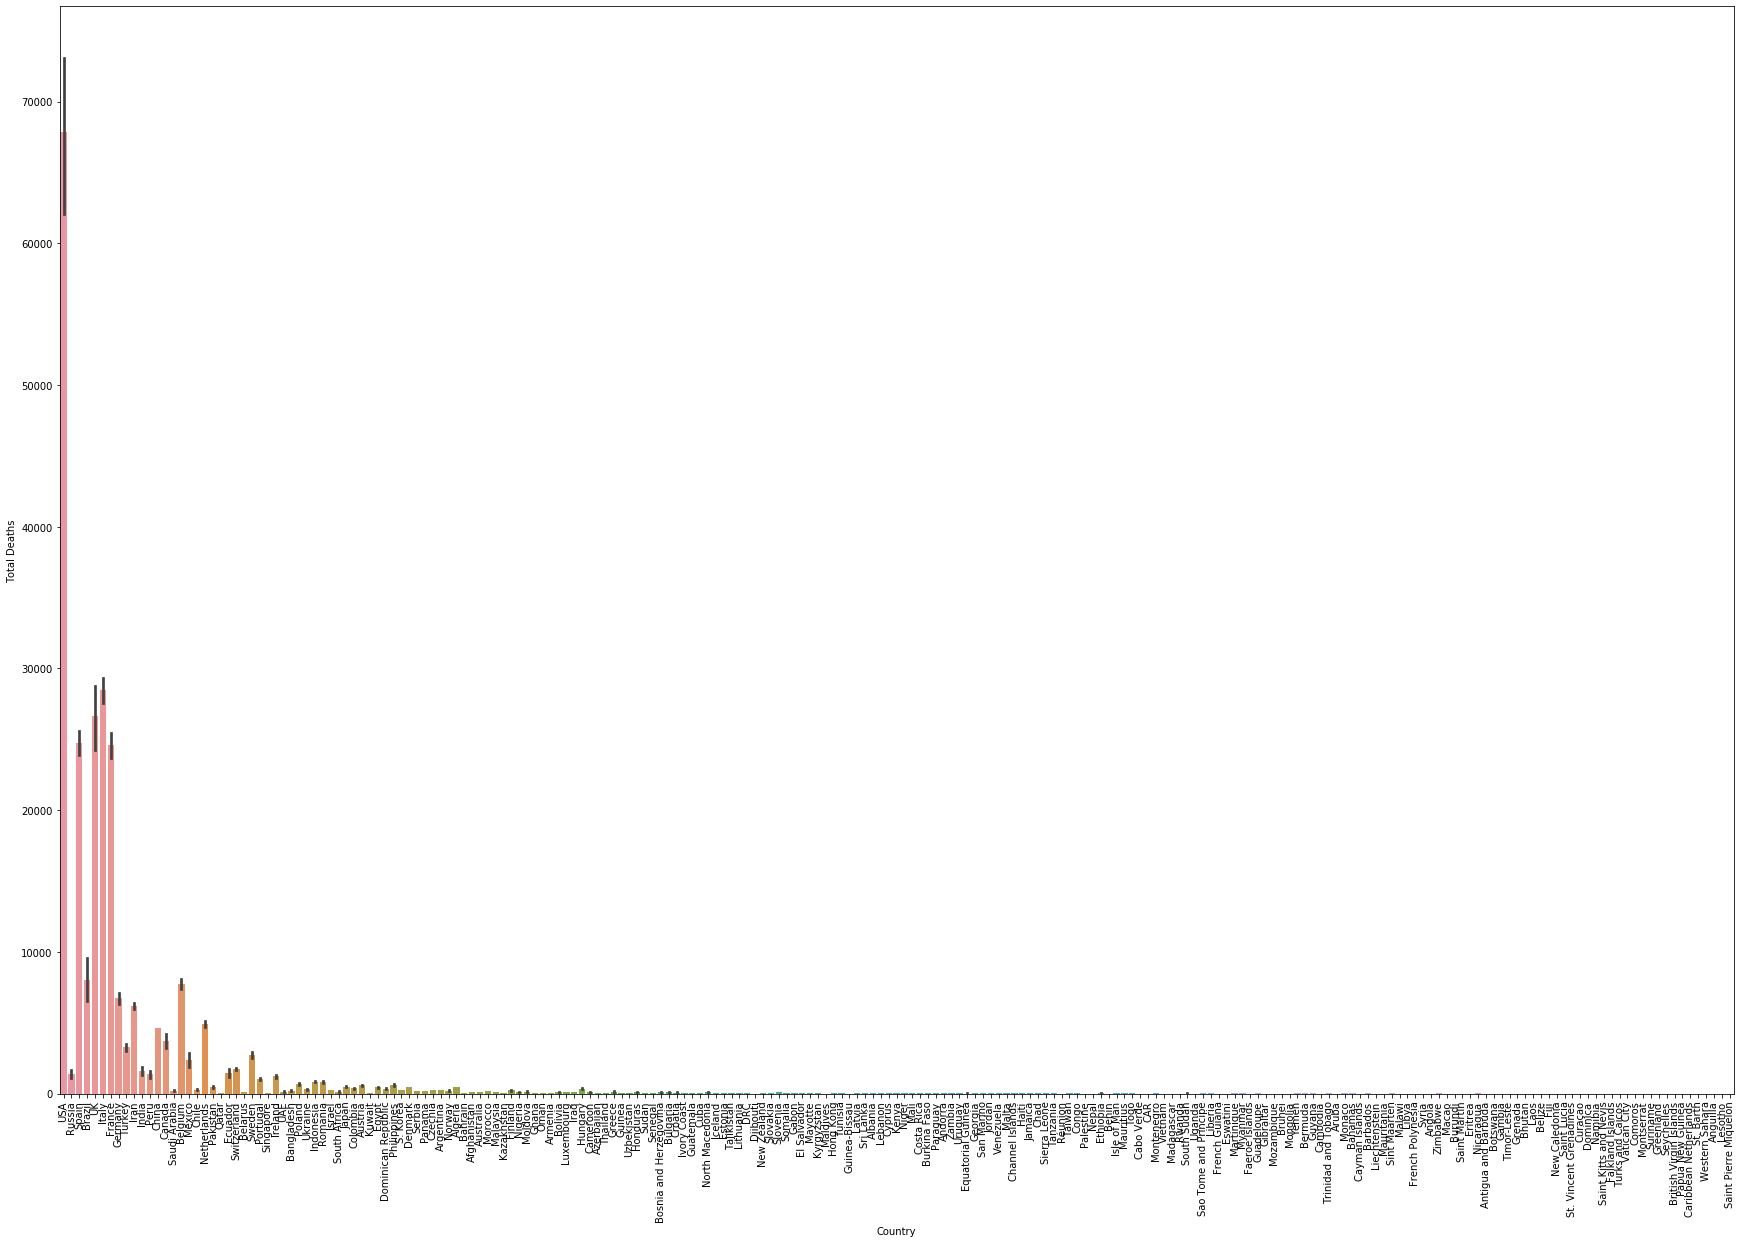

In [114]:
plt.figure(figsize=(30,20))
sns.barplot(x='Country',y='Total Deaths',data=df)
plt.xticks(rotation = 90)

(array([737532., 737536., 737540., 737544., 737546., 737550., 737554.,
        737558., 737562.]),
 <a list of 9 Text xticklabel objects>)

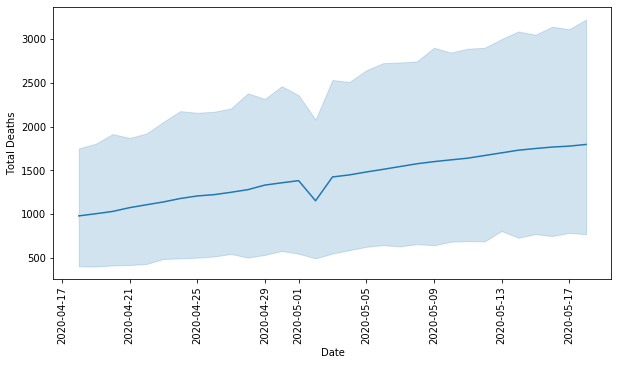

In [115]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date',y='Total Deaths',data=df)
plt.xticks(rotation = 90)

In [116]:
df.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [117]:
#df.drop('Country',axis=1,inplace= True)

In [118]:

df['Dates'] = pd.to_datetime(df['Date']).dt.date


In [119]:
df.drop('Date',axis=1,inplace= True)

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Dates']=pd.DataFrame(le.fit_transform(df.Dates))
df['Country']= le.fit_transform(df['Country'])

In [123]:
#so many missing values

In [124]:
#col=['Total Tests','Total Cases','Total Deaths','Total Recovered','Serious or Critical','Active Cases']

In [125]:
from sklearn.impute import KNNImputer
x=df
imputer = KNNImputer(n_neighbors=4)

x = imputer.fit_transform(x.values)

x = pd.DataFrame(x, columns=df.columns)
x.head()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Dates
0,201.0,330774664.0,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.0
1,158.0,145927292.0,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,0.0
2,180.0,46752703.0,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,0.0
3,26.0,212380932.0,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,0.0
4,200.0,67844241.0,460437.0,114217.0,15464.0,2855.5,1559.0,98409.0,0.0


In [126]:
x.isnull().sum()

Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
Dates                  0
dtype: int64

In [127]:
x.skew()

Country                 0.000000
Population              8.743503
Total Tests             8.878389
Total Cases            12.079297
Total Deaths            8.970126
Total Recovered         7.182585
Serious or Critical     9.143827
Active Cases           13.191067
Dates                   0.000000
dtype: float64

In [128]:
#Lets treat the skewness
import numpy as np
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.cbrt(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.cbrt(x[index])

In [129]:
x.skew()

Country                0.000000
Population             2.006228
Total Tests            1.923779
Total Cases            2.709975
Total Deaths           3.321930
Total Recovered        2.570129
Serious or Critical    3.245703
Active Cases           3.104226
Dates                  0.000000
dtype: float64

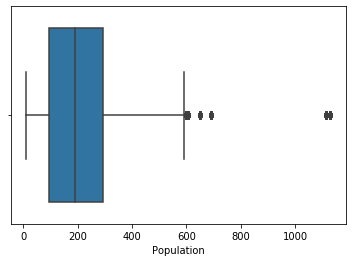

In [130]:
sns.boxplot(x['Population'])

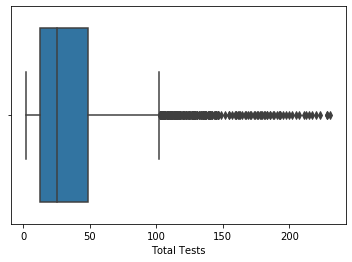

In [131]:
sns.boxplot(x['Total Tests'])

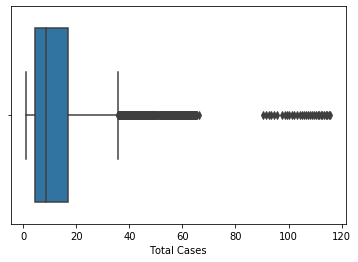

In [132]:
sns.boxplot(x['Total Cases'])

In [133]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z

array([[1.54503887, 2.8985063 , 3.92676711, ..., 6.20252741, 6.50044884,
        1.67705098],
       [0.84570549, 1.89233317, 2.85770974, ..., 0.37358047, 1.89748923,
        1.67705098],
       [1.20350397, 0.8793258 , 2.04684086, ..., 4.88390124, 3.11202908,
        1.67705098],
       ...,
       [1.64262028, 1.16581232, 1.04440208, ..., 0.67467105, 0.86962547,
        1.67705098],
       [0.06505427, 0.53071285, 0.40415747, ..., 0.28643628, 0.78372174,
        1.67705098],
       [0.95955046, 1.20658835, 1.04440208, ..., 0.67467105, 0.86962547,
        1.67705098]])

In [134]:
threshold=3
print(np.where(z>3))

(array([   0,    0,    0, ..., 6402, 6402, 6402], dtype=int64), array([2, 3, 4, ..., 1, 2, 5], dtype=int64))


In [135]:
df_new=x[(z<3).all(axis=1)]

In [136]:
df_new

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Dates
1,158.0,526.476319,122.358259,33.259961,6.789661,14.513266,2.000000,32.211811,0.0
8,197.0,438.351398,84.293240,43.502840,12.363856,21.864874,12.372572,41.210105,0.0
11,152.0,320.480720,51.412394,24.340066,7.033850,18.837018,4.890973,19.476412,0.0
13,36.0,335.318681,80.218983,32.198956,11.370314,22.378439,8.227825,27.459886,0.0
14,168.0,326.317586,53.132928,20.225775,4.514357,10.994488,4.272659,18.994458,0.0
...,...,...,...,...,...,...,...,...,...
6598,182.0,21.453478,3.301927,1.817121,0.793701,1.817121,1.000000,0.000000,30.0
6599,209.0,84.130089,7.392542,1.817121,0.908560,1.817121,3.166513,0.000000,30.0
6600,5.0,24.654994,3.301927,1.442250,0.793701,1.442250,1.000000,0.000000,30.0
6601,110.0,128.870591,22.836266,1.000000,3.738483,5.766493,2.289428,1.000000,30.0


In [137]:
x.shape

(6603, 9)

# ML

In [138]:
dfx=x.drop(['Total Deaths'],axis=1)

In [139]:
y=x['Total Deaths']

In [140]:
y

0       33.916172
1        6.789661
2       27.163616
3       13.315741
4       24.913837
          ...    
6598     0.793701
6599     0.908560
6600     0.793701
6601     3.738483
6602     0.908560
Name: Total Deaths, Length: 6603, dtype: float64

In [141]:
dfx

,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases,Dates
0,201.0,691.582633,154.975994,90.401172,40.870302,23.840962,85.794579,0.0
1,158.0,526.476319,122.358259,33.259961,14.513266,2.000000,32.211811,0.0
2,180.0,360.248550,97.618047,57.930952,42.133551,19.461462,46.350194,0.0
3,26.0,596.630120,39.787414,33.238553,24.116333,18.789930,27.294893,0.0
4,200.0,407.853628,77.218863,48.518822,14.187114,11.595301,46.168412,0.0
...,...,...,...,...,...,...,...,...
6598,182.0,21.453478,3.301927,1.817121,1.817121,1.000000,0.000000,30.0
6599,209.0,84.130089,7.392542,1.817121,1.817121,3.166513,0.000000,30.0
6600,5.0,24.654994,3.301927,1.442250,1.442250,1.000000,0.000000,30.0
6601,110.0,128.870591,22.836266,1.000000,5.766493,2.289428,1.000000,30.0


In [142]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
newx=sc.fit_transform(dfx)
newx

array([[ 1.54503887,  2.8985063 ,  3.92676711, ...,  6.20252741,
         6.50044884, -1.67705098],
       [ 0.84570549,  1.89233317,  2.85770974, ..., -0.37358047,
         1.89748923, -1.67705098],
       [ 1.20350397,  0.8793258 ,  2.04684086, ...,  4.88390124,
         3.11202908, -1.67705098],
       ...,
       [-1.64262028, -1.16581232, -1.04440208, ..., -0.67467105,
        -0.86962547,  1.67705098],
       [ 0.06505427, -0.53071285, -0.40415747, ..., -0.28643628,
        -0.78372174,  1.67705098],
       [ 0.95955046, -1.20658835, -1.04440208, ..., -0.67467105,
        -0.86962547,  1.67705098]])

In [143]:
newx=pd.DataFrame(newx,columns=dfx.columns)
newx

,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases,Dates
0,1.545039,2.898506,3.926767,5.594527,3.271502,6.202527,6.500449,-1.677051
1,0.845705,1.892333,2.857710,1.467260,0.566026,-0.373580,1.897489,-1.677051
2,1.203504,0.879326,2.046841,3.249227,3.401171,4.883901,3.112029,-1.677051
3,-1.301085,2.319857,0.151422,1.465714,1.551754,4.681709,1.475108,-1.677051
4,1.528775,1.169436,1.378251,2.569396,0.532547,2.515474,3.096413,-1.677051
...,...,...,...,...,...,...,...,...
6598,1.236031,-1.185323,-1.044402,-0.803833,-0.737198,-0.674671,-0.869625,1.677051
6599,1.675147,-0.803366,-0.910331,-0.803833,-0.737198,-0.022354,-0.869625,1.677051
6600,-1.642620,-1.165812,-1.044402,-0.830909,-0.775678,-0.674671,-0.869625,1.677051
6601,0.065054,-0.530713,-0.404157,-0.862853,-0.331806,-0.286436,-0.783722,1.677051


In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,newx,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [145]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,newx,y):
    c_scores=cross_val_score(model,newx,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [146]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
final_r_state=maxr2_score(lnr,newx,y)

r2 score corresponding to  42  is  0.9028117510676991
r2 score corresponding to  43  is  0.8902788468618266
r2 score corresponding to  44  is  0.9009100484363824
r2 score corresponding to  45  is  0.8820745310033313
r2 score corresponding to  46  is  0.884768721147159
r2 score corresponding to  47  is  0.8883404597871747
r2 score corresponding to  48  is  0.8909048651202893
r2 score corresponding to  49  is  0.887218266368235
r2 score corresponding to  50  is  0.9049994250244829
r2 score corresponding to  51  is  0.8880057059209805
r2 score corresponding to  52  is  0.8929521906334852
r2 score corresponding to  53  is  0.8910038467469167
r2 score corresponding to  54  is  0.9018158027625701
r2 score corresponding to  55  is  0.903758791214145
r2 score corresponding to  56  is  0.9090430024432439
r2 score corresponding to  57  is  0.8862977712642813
r2 score corresponding to  58  is  0.8870180691153193
r2 score corresponding to  59  is  0.8758285819482924
r2 score corresponding to  60  

In [147]:
model_evaluation(lnr,newx,y)

Mean r2 score for regressor:  0.8974294662404384
standard deviation in r2 score for regressor:  0.0120405569433156
[0.91364468 0.90467004 0.89994947 0.89017719 0.87870595]


In [148]:
#Linear regressor as final model
x_train,x_test, y_train, y_test = train_test_split(newx, y,random_state = 99,test_size=0.20)
lnr.fit(x_train,y_train)
lnrpred=lnr.predict(x_test)

In [149]:
print('R2 score',r2_score(lnrpred,y_test))
print('Mean Absolute Error',mean_absolute_error(lnrpred,y_test))
print('Mean Squared Error',mean_squared_error(lnrpred,y_test))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(lnrpred,y_test)))

R2 score 0.9076871881600252
Mean Absolute Error 1.0651440382446684
Mean Squared Error 3.031135270425702
Root Mean Squared Error 1.7410155859226828


  now examine the relationship with age

In [151]:
df1=pd.read_csv('covid19worldwide2populationstructure_by_age_per_country.csv')
df1

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [152]:
df1.isnull().sum()

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

In [154]:
df1.dtypes

Country                      object
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

In [155]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Country']= le.fit_transform(df1['Country'])

In [156]:
from sklearn.impute import KNNImputer
x1=df1
imputer = KNNImputer(n_neighbors=4)

x1 = imputer.fit_transform(x1.values)

x1 = pd.DataFrame(x1, columns=df1.columns)
x1.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,201.0,0.189,0.657,0.154
1,158.0,0.176,0.682,0.142
2,180.0,0.147,0.659,0.194
3,26.0,0.217,0.697,0.086
4,200.0,0.177,0.638,0.185


In [157]:
x1.isnull().sum()

Country                     0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64